# Time series demo 3: AR(p) models on real tick data

**Guest lecture**

Columbia IEOR 4729 : _Model Based Trading: Theory and Practice_

Q McCallum (http://qethanm.cc)

In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed( 4729 )

In [3]:
## local: 
data_file = "data/GOOG-trades-20190901-20190930-382d94c05e6b384c.pkl.bz2"

In [5]:
data_raw = pd.read_pickle( data_file )
data_raw.tail(10)

,DATE_TIME_M,EX,SYM_ROOT,SYM_SUFFIX,TR_SCOND,SIZE,PRICE,TR_CORR,TR_SEQNUM,TR_ID,TR_SOURCE,TR_RF
1330696,2019-09-30 15:59:59.640678235,V,GOOG,L,@,100,1220.79,0,2600521,939,N,NaN
1330697,2019-09-30 15:59:59.648136874,Q,GOOG,L,@F I,50,1220.79,0,2600524,16663,N,NaN
1330698,2019-09-30 15:59:59.648140793,Q,GOOG,L,@F I,10,1220.79,0,2600525,16664,N,NaN
1330699,2019-09-30 15:59:59.648144631,Q,GOOG,L,@F I,40,1220.79,0,2600526,16665,N,NaN
1330700,2019-09-30 15:59:59.666417713,D,GOOG,L,@ I,5,1220.85,0,2600560,5980,N,Q
1330701,2019-09-30 15:59:59.907493138,Q,GOOG,L,@F,100,1221.15,0,2601039,16666,N,NaN
1330702,2019-09-30 15:59:59.907496174,Q,GOOG,L,@F,100,1221.15,0,2601040,16667,N,NaN
1330703,2019-09-30 15:59:59.907500548,Q,GOOG,L,@F,100,1221.15,0,2601041,16668,N,NaN
1330704,2019-09-30 15:59:59.962355914,B,GOOG,L,@ I,4,1220.73,0,2601362,1887,N,NaN
1330705,2019-09-30 15:59:59.978083573,D,GOOG,L,@ I,60,1220.88,0,2601448,5981,N,Q


In [6]:
data_raw.columns

Index(['DATE_TIME_M', 'EX', 'SYM_ROOT', 'SYM_SUFFIX', 'TR_SCOND', 'SIZE',
       'PRICE', 'TR_CORR', 'TR_SEQNUM', 'TR_ID', 'TR_SOURCE', 'TR_RF'],
      dtype='object')

In [7]:
len( data_raw )

1330706

In [8]:
## That's a lot of data for this example, so let's take the first
## few thousand values.

## For the sake of example, we are making the (very big!) assumption that the
## data will fit an autoregressive model...
y_ar_tick = data_raw[ "PRICE" ][ 1000:2000 ]

In [9]:
y_ar_tick[:10]

1000    1177.43
1001    1177.43
1002    1177.38
1003    1177.45
1004    1177.45
1005    1177.45
1006    1176.91
1007    1177.45
1008    1177.45
1009    1177.45
Name: PRICE, dtype: float64

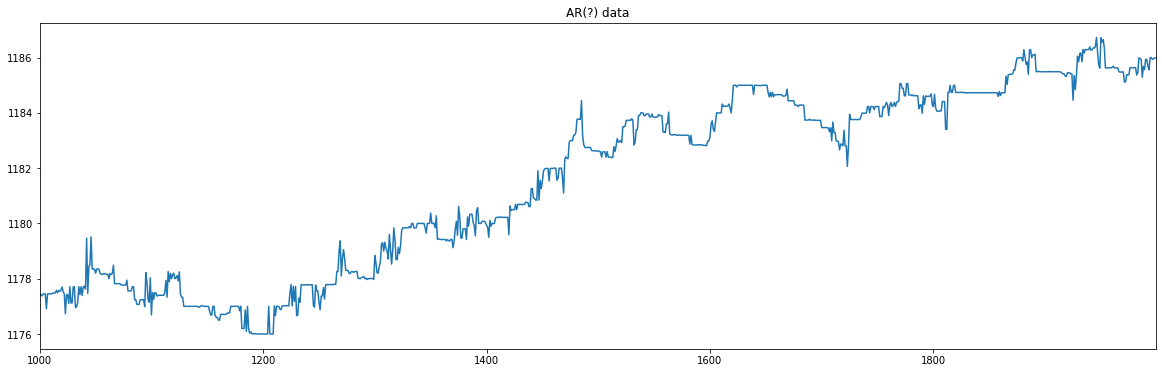

In [10]:
## Well, how does the raw data look?
_ = pd.Series( y_ar_tick ).plot(
    title = "AR(?) data" ,
    figsize = ( 20 , 6 )
)

## Looking like a random walk ...

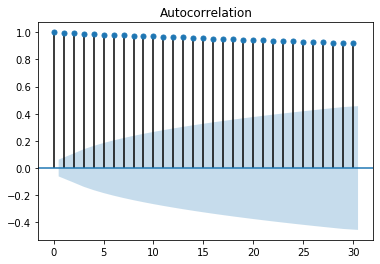

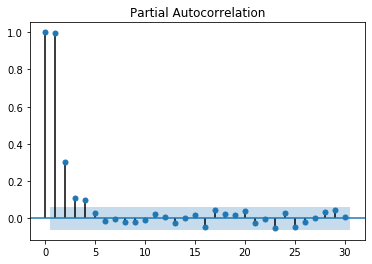

In [11]:
## As always, let's check those ACF and PACFs
_ = sm.graphics.tsa.plot_acf( y_ar_tick )
_ = sm.graphics.tsa.plot_pacf( y_ar_tick )

So ... these ACF and PACF plots are indicative of a random walk.  Notice the slow degrade on the ACF/correlogram, compared to the what you see with white noise.

In [12]:
## Still, let's try to fit this series to a model. 
## Our trusty for() loop makes a return:

ar_p_to_try = [
    (6,0) ,
    (5,0) ,
    (4,0) ,
    (3,0) ,
    (2,0) ,
    (1,0) ,
]

param_search_results = []

print( "(Remember: lowest AIC wins)" )

for ar_p in ar_p_to_try :
    print( "trying parameters: {}".format( ar_p ) )
    model_testing = sm.tsa.ARMA( y_ar_tick , ar_p ).fit( trend="nc" , disp=0 )
    ## model_testing = sm.tsa.AR( y_ar ).fit( maxlag=10 )

    print( "model params: {}".format( model_testing.params ) )
    print( "AIC:     {}".format( model_testing.aic ) )
    print( "BIC:     {}".format( model_testing.bic ) )
    print()

(Remember: lowest AIC wins)
trying parameters: (6, 0)


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


model params: ar.L1.PRICE    0.551969
ar.L2.PRICE    0.215416
ar.L3.PRICE    0.061816
ar.L4.PRICE    0.106860
ar.L5.PRICE    0.061715
ar.L6.PRICE    0.002224
dtype: float64
AIC:     282.29518919614065
BIC:     316.64947614901564

trying parameters: (5, 0)


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


model params: ar.L1.PRICE    0.552293
ar.L2.PRICE    0.216114
ar.L3.PRICE    0.061269
ar.L4.PRICE    0.107084
ar.L5.PRICE    0.063239
dtype: float64
AIC:     280.63324536405025
BIC:     310.0797770379431

trying parameters: (4, 0)


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


model params: ar.L1.PRICE    0.565040
ar.L2.PRICE    0.220025
ar.L3.PRICE    0.073101
ar.L4.PRICE    0.141835
dtype: float64
AIC:     282.3092765586889
BIC:     306.84805295359956

trying parameters: (3, 0)
model params: ar.L1.PRICE    0.583231
ar.L2.PRICE    0.256756
ar.L3.PRICE    0.160013
dtype: float64
AIC:     301.2795425566005
BIC:     320.91056367252907

trying parameters: (2, 0)
model params: ar.L1.PRICE    0.641837
ar.L2.PRICE    0.358163
dtype: float64
AIC:     325.0428750536853
BIC:     339.76614089063173

trying parameters: (1, 0)
model params: ar.L1.PRICE    1.0
dtype: float64
AIC:     461.43476638732864
BIC:     471.2502769452929



In [15]:
testing_params = ( 5 , 0 )
fit_ar_tick = sm.tsa.ARMA( y_ar_tick , testing_params ).fit( trend="nc" , disp=0 )
fit_ar_tick.summary()

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  PRICE   No. Observations:                 1000
Model:                     ARMA(5, 0)   Log Likelihood                -134.317
Method:                       css-mle   S.D. of innovations              0.274
Date:                Fri, 17 Apr 2020   AIC                            280.633
Time:                        17:00:46   BIC                            310.080
Sample:                             0   HQIC                           291.825
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.PRICE     0.5523        nan        nan        nan         nan         nan
ar.L2.PRICE     0.2161        nan        nan        nan         nan         nan
ar.L3.PRICE     0.0613        nan        nan        nan         nan         nan
ar.L4.PRICE     0.1071        nan        nan        nan         nan         nan
ar.L5.PRICE     0.0632   3.34e-06   1.89e+04      0.000       0.063       0.063
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           -0.0000j            1.0000           -0.0000
AR.2            0.5767           -1.7180j            1.8122           -0.1985
AR.3            0.5767           +1.7180j            1.8122            0.1985
AR.4           -1.9234           -1.0562j            2.1943           -0.4201
AR.5           -1.9234           +1.0562j            2.1943            0.4201
-----------------------------------------------------------------------------
"""

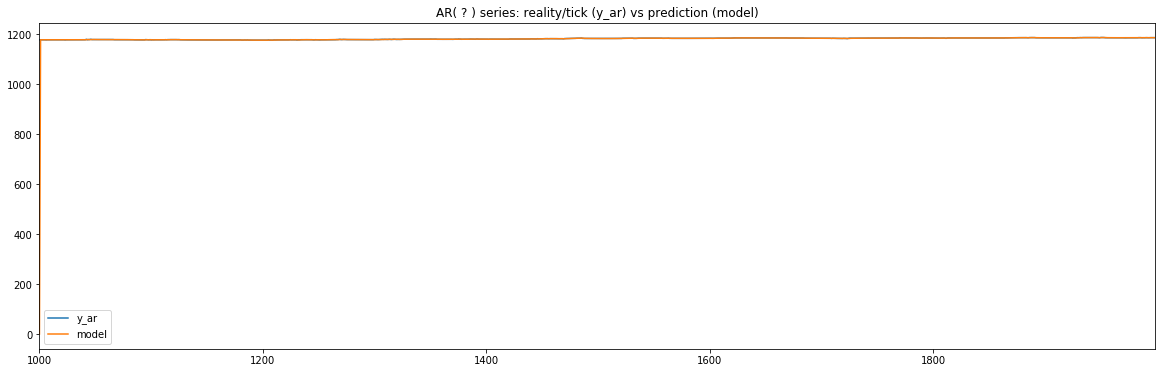

In [16]:
_ = pd.DataFrame(
    {
        "y_ar"   : y_ar_tick , 
        "model"  : fit_ar_tick.fittedvalues
    }
).plot(
    title = "AR( ? ) series: reality/tick (y_ar) vs prediction (model)" ,
    figsize = ( 20 , 6 )
)

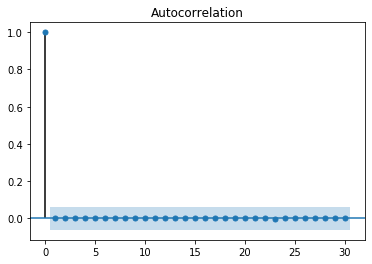

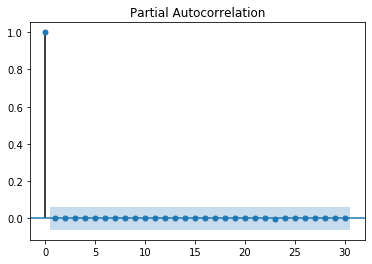

In [17]:
## Don't forget to check those residuals!
_ = sm.graphics.tsa.plot_acf( fit_ar_tick.resid )
_ = sm.graphics.tsa.plot_pacf( fit_ar_tick.resid )

## Let's try this again ...

In [18]:
## The _second_ time we run this, we handle the integrated series
## (aka we take the _diff_ of the values) and try again.
y_ar_tick_diff = y_ar_tick.diff()

In [19]:
## How does this diff look?
## Let's inspect the first few values
y_ar_tick_diff[:20]

1000     NaN
1001    0.00
1002   -0.05
1003    0.07
1004    0.00
1005    0.00
1006   -0.54
1007    0.54
1008    0.00
1009    0.00
1010    0.01
1011   -0.01
1012    0.04
1013   -0.01
1014    0.01
1015    0.09
1016   -0.09
1017    0.09
1018   -0.04
1019    0.04
Name: PRICE, dtype: float64

In [20]:
## We drop the first term, since the first item in the diff()
## result is NaN ... and that _really_ throws off the rest
## of the code.

y_ar_tick_diff = y_ar_tick_diff[1:]

In [21]:
y_ar_tick_diff[:20]

1001    0.00
1002   -0.05
1003    0.07
1004    0.00
1005    0.00
1006   -0.54
1007    0.54
1008    0.00
1009    0.00
1010    0.01
1011   -0.01
1012    0.04
1013   -0.01
1014    0.01
1015    0.09
1016   -0.09
1017    0.09
1018   -0.04
1019    0.04
1020    0.12
Name: PRICE, dtype: float64

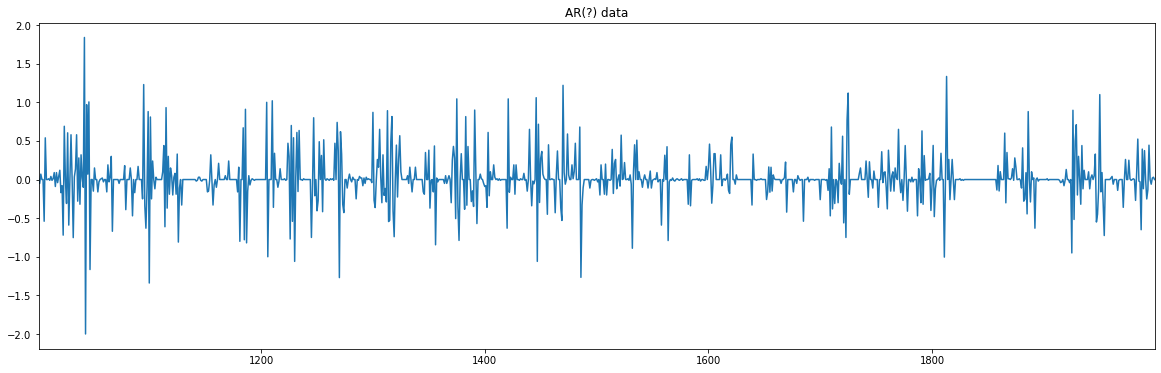

In [22]:
## Well, how does the data look now?
_ = pd.Series( y_ar_tick_diff ).plot(
    title = "AR(?) data" ,
    figsize = ( 20 , 6 )
)

## Looking like a random walk ...

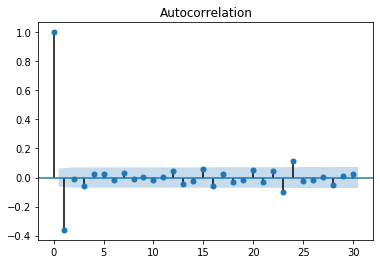

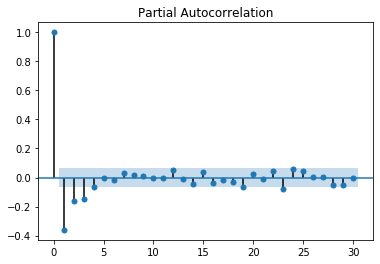

In [23]:
## As always, let's check those ACF and PACFs
_ = sm.graphics.tsa.plot_acf( y_ar_tick_diff )
_ = sm.graphics.tsa.plot_pacf( y_ar_tick_diff )


In [24]:
## Now, let's try to fit this again:

ar_p_to_try = [
    (6,0) ,
    (5,0) ,
    (4,0) ,
    (3,0) ,
    (2,0) ,
    (1,0) ,
]

param_search_results = []

print( "(Remember: lowest AIC wins)" )

for ar_p in ar_p_to_try :
    print( "trying parameters: {}".format( ar_p ) )
    model_testing = sm.tsa.ARMA( y_ar_tick_diff , ar_p ).fit( trend="nc" , disp=0 )
    ## model_testing = sm.tsa.AR( y_ar ).fit( maxlag=10 )

    print( "model params: {}".format( model_testing.params ) )
    print( "AIC:     {}".format( model_testing.aic ) )
    print( "BIC:     {}".format( model_testing.bic ) )
    print()

(Remember: lowest AIC wins)
trying parameters: (6, 0)
model params: ar.L1.PRICE   -0.448239
ar.L2.PRICE   -0.233460
ar.L3.PRICE   -0.172740
ar.L4.PRICE   -0.066752
ar.L5.PRICE   -0.007226
ar.L6.PRICE   -0.010708
dtype: float64
AIC:     265.0565900675806
BIC:     299.40387351812046

trying parameters: (5, 0)
model params: ar.L1.PRICE   -0.448212
ar.L2.PRICE   -0.232763
ar.L3.PRICE   -0.170903
ar.L4.PRICE   -0.064256
ar.L5.PRICE   -0.002419
dtype: float64
AIC:     263.1710930316449
BIC:     292.61162170353623

trying parameters: (4, 0)
model params: ar.L1.PRICE   -0.448058
ar.L2.PRICE   -0.232349
ar.L3.PRICE   -0.170339
ar.L4.PRICE   -0.063170
dtype: float64
AIC:     261.17696692610025
BIC:     285.710740819343

trying parameters: (3, 0)
model params: ar.L1.PRICE   -0.439000
ar.L2.PRICE   -0.218495
ar.L3.PRICE   -0.142554
dtype: float64
AIC:     263.18692358038334
BIC:     282.8139426949775

trying parameters: (2, 0)
model params: ar.L1.PRICE   -0.416239
ar.L2.PRICE   -0.159042
dtype: fl

In [25]:
testing_params = ( 4 , 0 )
fit_ar_tick_diff = sm.tsa.ARMA( y_ar_tick_diff , testing_params ).fit( trend="nc" , disp=0 )
fit_ar_tick.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  PRICE   No. Observations:                 1000
Model:                     ARMA(5, 0)   Log Likelihood                -134.317
Method:                       css-mle   S.D. of innovations              0.274
Date:                Fri, 17 Apr 2020   AIC                            280.633
Time:                        17:04:07   BIC                            310.080
Sample:                             0   HQIC                           291.825
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.PRICE     0.5523        nan        nan        nan         nan         nan
ar.L2.PRICE     0.2161        nan        nan        nan         nan         nan
ar.L3.PRICE     0.0613        nan        nan        nan         nan         nan
ar.L4.PRICE     0.1071        nan        nan        nan         nan         nan
ar.L5.PRICE     0.0632   3.34e-06   1.89e+04      0.000       0.063       0.063
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           -0.0000j            1.0000           -0.0000
AR.2            0.5767           -1.7180j            1.8122           -0.1985
AR.3            0.5767           +1.7180j            1.8122            0.1985
AR.4           -1.9234           -1.0562j            2.1943           -0.4201
AR.5           -1.9234           +1.0562j            2.1943            0.4201
-----------------------------------------------------------------------------
"""

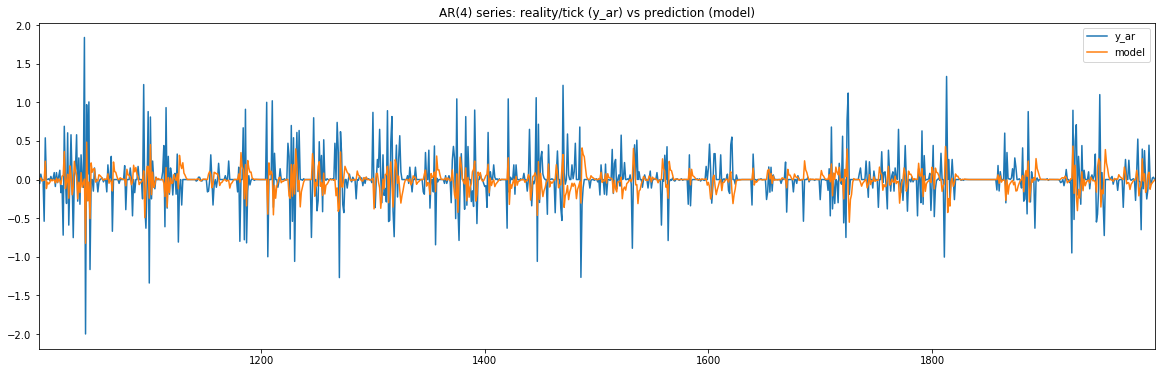

In [27]:
_ = pd.DataFrame(
    {
        "y_ar"   : y_ar_tick_diff , 
        "model"  : fit_ar_tick_diff.fittedvalues
    }
).plot(
    title = "AR(4) series: reality/tick (y_ar) vs prediction (model)" ,
    figsize = ( 20 , 6 )
)

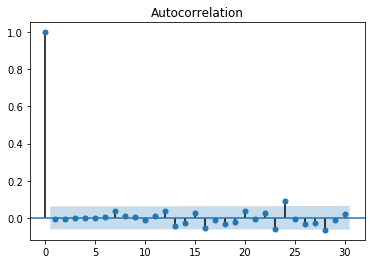

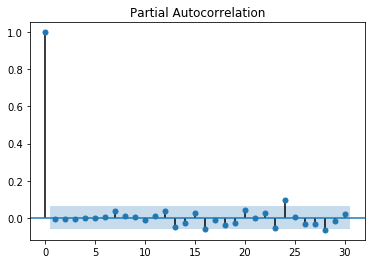

In [28]:
## Don't forget to check those residuals!
_ = sm.graphics.tsa.plot_acf( fit_ar_tick_diff.resid )
_ = sm.graphics.tsa.plot_pacf( fit_ar_tick_diff.resid )